In [ ]:
# !cp /content/drive/MyDrive/VeriAnalizi/Datasets/airbnb_nyc_final.csv -r /content

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={"figure.figsize":(20, 10)})

In [ ]:
df = pd.read_csv("airbnb_nyc_final.csv", delimiter=",", encoding="UTF-8");
df.head()

<ipython-input-5-d1d23b92740c>:1: DtypeWarning: Columns (11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb_nyc_final.csv", delimiter=",", encoding="UTF-8")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,date,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,NaN,NaN,1.0,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1.0,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.size

782320

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'date', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48895 non-null  int64 
 1   name                            48879 non-null  object
 2   host_id                         48894 non-null  object
 3   host_name                       48874 non-null  object
 4   neighbourhood_group             48895 non-null  object
 5   neighbourhood                   48895 non-null  object
 6   latitude                        48895 non-null  object
 7   longitude                       48895 non-null  object
 8   room_type                       48895 non-null  object
 9   price                           48895 non-null  object
 10  minimum_nights                  48895 non-null  object
 11  number_of_reviews               48895 non-null  object
 12  date                            38857 non-null

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.0,9471945.0,19677284.0,29152178.5,36487245.0


In [ ]:
df.drop(["name", "id", "host_id", "host_name"], inplace=True, axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,date,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355
2,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,NaN,NaN,1.0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1.0,0


In [ ]:
integers = ["minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]

for column in integers:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # just fill nan values with mean

  df[column] = df[column].astype("int64")  # the type will be converted to int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   latitude                        48895 non-null  object
 3   longitude                       48895 non-null  object
 4   room_type                       48895 non-null  object
 5   price                           48895 non-null  int64 
 6   minimum_nights                  48895 non-null  int64 
 7   number_of_reviews               48895 non-null  int64 
 8   date                            48895 non-null  object
 9   reviews_per_month               48895 non-null  object
 10  calculated_host_listings_count  48895 non-null  int64 
 11  availability_365                48895 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


<Axes: xlabel='price', ylabel='Count'>

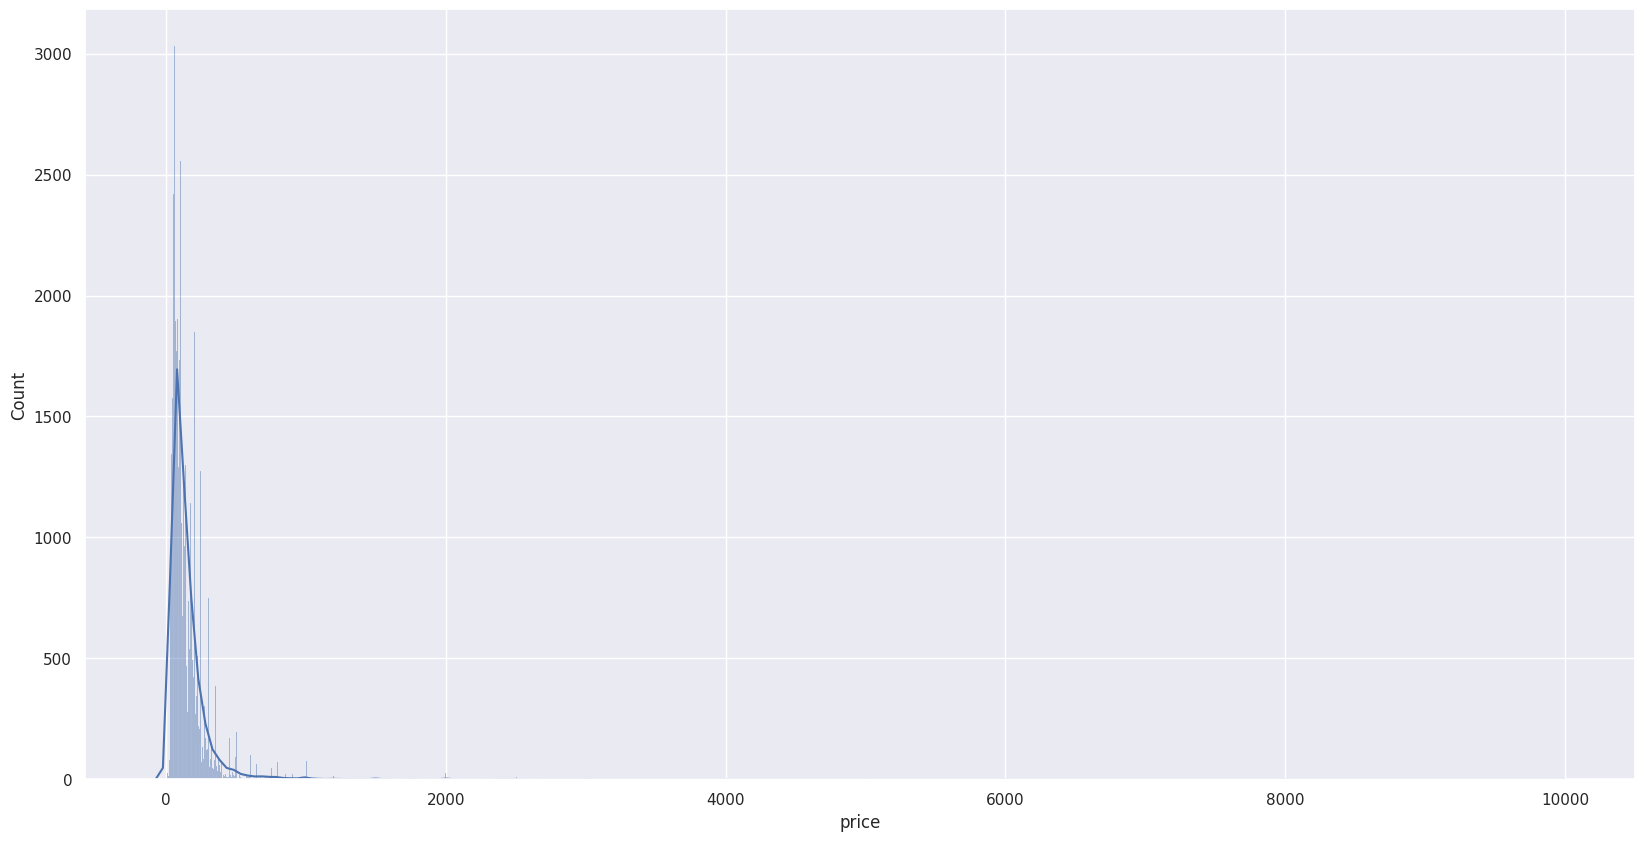

In [ ]:
sns.histplot(df["price"], kde=True)

In [ ]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # filling NA values with mean

  df[column] = df[column].astype("float64") #converting the type to int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   date                            48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

<Axes: xlabel='price', ylabel='Count'>

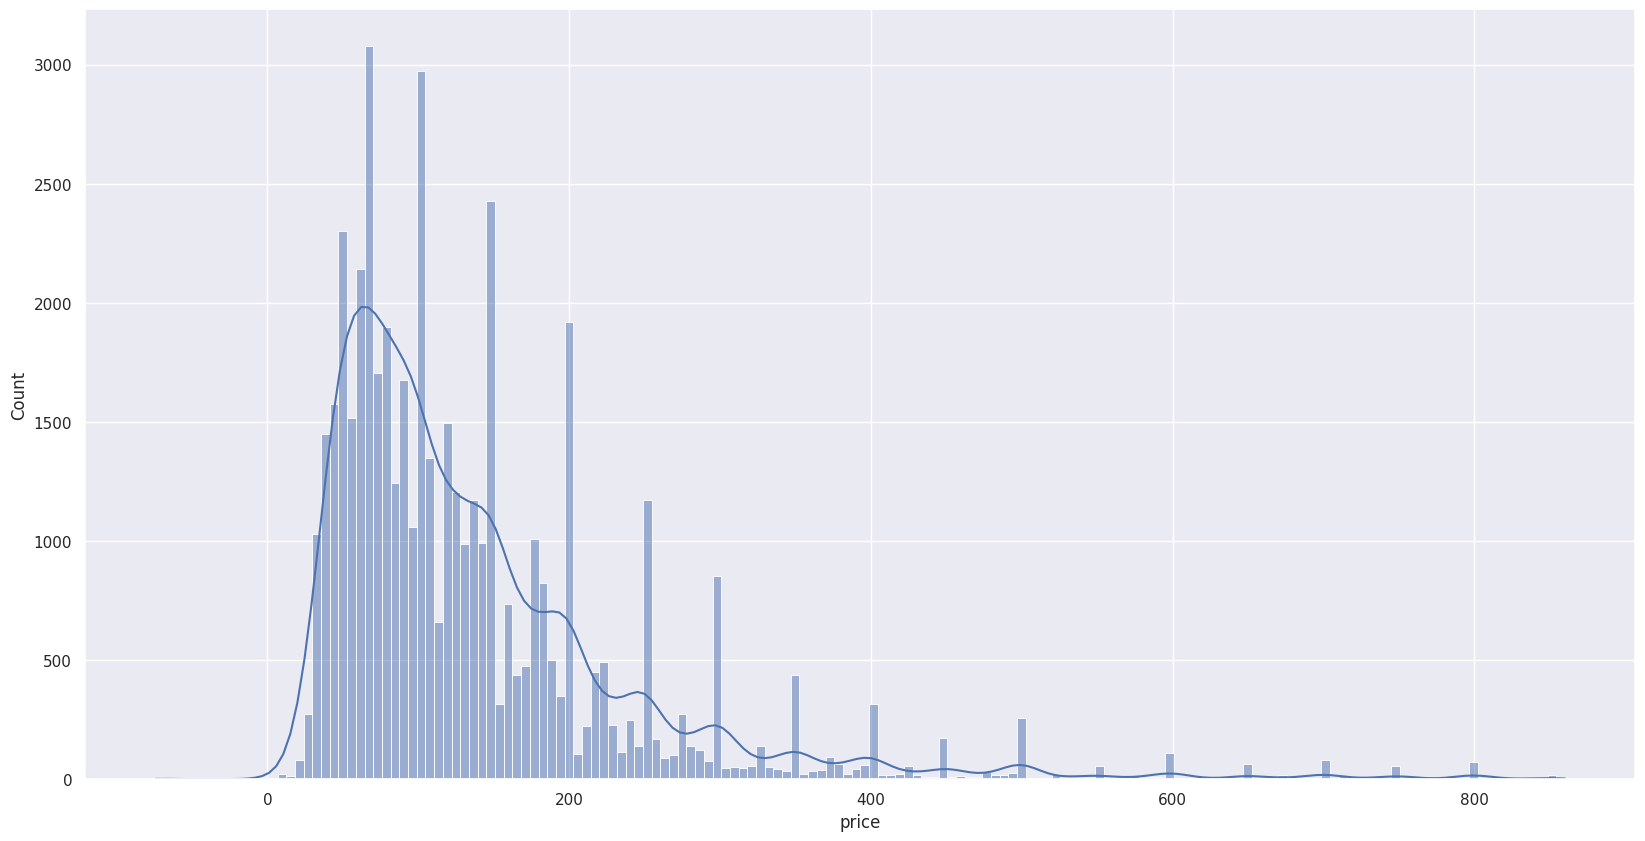

In [ ]:
sns.histplot(df["price"], kde=True)

In [ ]:
df.groupby("room_type")["room_type"].value_counts()

room_type     room_type   
-73.78175     -73.78175           1
-73.7823      -73.7823            1
-73.78237     -73.78237           1
-73.78275     -73.78275           1
-73.7961      -73.7961            1
                              ...  
Erin V.       Erin V.             1
Private room  Private room    22287
Shared room   Shared room      1148
South Slope   South Slope         1
Sunnyside     Sunnyside           1
Name: room_type, Length: 85, dtype: int64

In [ ]:
for key, value in df.groupby(by="room_type")["room_type"].value_counts().items():
  if value==1:
    df.loc[df["room_type"]==key[0], "room_type"] = "unknown_type"

df.groupby(by="room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    25378
Private room     Private room       22287
Shared room      Shared room         1148
unknown_type     unknown_type          82
Name: room_type, dtype: int64

In [ ]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
date                              0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.loc[df.isna()["date"], "date"] = "unknown_date"

In [ ]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
date                              0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,date,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21000,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38000,2.0,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,5.94781,5.94781,1.0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05,4.64000,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10000,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   date                            48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

In [ ]:
object_columns = df.select_dtypes("object").columns
object_columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'date'], dtype='object')

In [ ]:
for column in object_columns:
  df[column] = df[column].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  float64 
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   date                            48895 non-null  category
 9   reviews_per_month               48895 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  float64 
 11  availability_365                48895 non-null  int64   
dtypes: category(4), fl

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728759,0.054179,40.49979,40.690145,40.72317,40.762945,40.89245
longitude,48895.0,-73.790339,4.305208,-74.24442,-73.983050,-73.95566,-73.936125,40.86317
price,48895.0,138.756494,107.106806,-74.00000,69.000000,107.00000,175.000000,860.00000
minimum_nights,48895.0,5.937621,9.047250,-73.00000,1.000000,3.00000,5.000000,76.00000
number_of_reviews,48895.0,18.148666,29.304551,0.00000,1.000000,5.00000,20.000000,156.00000
reviews_per_month,48895.0,2.290640,2.317673,0.00000,0.280000,1.22000,4.410000,9.43000
calculated_host_listings_count,48895.0,2.235090,3.636004,0.00000,1.000000,1.00000,2.000000,34.00000
availability_365,48895.0,112.590531,131.601892,0.00000,0.000000,44.00000,226.000000,365.00000


In [ ]:
df.pivot_table(values=["number_of_reviews", "availability_365", "price"],
               columns="room_type",
               aggfunc=np.mean)

room_type,Entire home/apt,Private room,Shared room,unknown_type
availability_365,111.938135,111.202226,161.585366,5.902439
number_of_reviews,18.300024,18.184053,14.504355,12.707317
price,190.426294,83.745603,66.561869,109.865854


In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,date,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21000,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38000,2.0,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,5.94781,5.94781,1.0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05,4.64000,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10000,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  float64 
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   date                            48895 non-null  category
 9   reviews_per_month               48895 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  float64 
 11  availability_365                48895 non-null  int64   
dtypes: category(4), fl

In [ ]:
df.to_csv("airbnb_nyc_preprocessed.csv")